### Regression using numpy (with pyplot)

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Cities.csv into list of dictionaries
cities = []
with open('Cities.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        cities.append(r)

In [ ]:
# Introduction to plotting a line
plt.plot([1,2], [2,4], color='green')
plt.show()

In [ ]:
# Create latitude versus temperature scatterplot
lats = []
temps = []
for city in cities:
    lats.append(float(city['latitude']))
    temps.append(float(city['temperature']))
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.scatter(lats, temps)
plt.show()

In [ ]:
# Add linear regression
plt.scatter(lats,temps)
a,b = np.polyfit(lats, temps, 1) # Regression line is y = ax + b
x1 = min(lats)
x2 = max(lats)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Beautify using plt.xlim(x1,x2)

In [ ]:
plt.xlim(x1,x2)
plt.show()

In [ ]:
# Correlation coefficients (r values)
cc = np.corrcoef(lats,temps)[1,0]
print 'Correlation coefficient for latitude versus temperature:', cc
longs = []
for city in cities:
    longs.append(float(city['longitude']))
cc = np.corrcoef(longs,temps)[1,0]
print 'Correlation coefficient for longitude versus temperature:', cc

In [ ]:
# Use linear regression for temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
lats = []
temps = []
for city in cities:
    if city['country'] == 'Norway' or city['country'] == 'France' or city['country'] == 'Turkey':
        lats.append(float(city['latitude']))
        temps.append(float(city['temperature']))
# Compute and show regression
plt.scatter(lats,temps)
a,b = np.polyfit(lats, temps, 1)
x1 = min(lats)
x2 = max(lats)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    else:
        i=0
        while i < len(cities) and cities[i]['city'] != name: i += 1
        if i == len(cities):
            print 'City not in dataset'
        else:
            print 'Predicted temperature:', a * float(cities[i]['latitude']) + b
            print 'Actual temperature:', cities[i]['temperature']

### <font color="green">Your Turn: World Cup Data</font>

In [4]:
# Read Players.csv into list of dictionaries
players = []
with open('Players.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        players.append(r)

In [ ]:
# From the players data, compute and plot a linear regression for
# minutes played versus passes made.
# Reminder: copy-paste-modify approach to programming!

minutes = []
passes = []

for player in players:
    minutes.append(float(player['minutes']))
    passes.append(float(player['passes']))

plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(minutes,passes)
a,b = np.polyfit(minutes, passes, 1) # Regression line is y = ax + b #1 is the degree of equation 1 stands for linear
x1 = min(minutes)
x2 = max(minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
print a
plt.xlim(x1,x2)
plt.show()




In [ ]:
# Show the correlation coefficient for the regression.
# Extra credit: Also show correlation coefficients for minutes played
# versus tackles, minutes played versus shots, and minutes played versus saves
print "correlation coefficient is: ",  a

tackles = []
shots = []
saves = []
for player in players:
    tackles.append(float(player['tackles']))
    shots.append(float(player['shots']))
    saves.append(float(player['saves']))

# Correlation coefficients (r values)
cc = np.corrcoef(minutes,tackles)[1,0] 
print 'Correlation coefficient for minutes versus tackles:', cc
cc = np.corrcoef(minutes,shots)[1,0]
print 'Correlation coefficient for minutes versus shots:', cc
cc = np.corrcoef(minutes,saves)[1,0]
print 'Correlation coefficient for minutes versus saves:', cc

In [ ]:
# Use linear regression for number-of-passes predictor.
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
minutes = []
passes = []

for player in players:
    if player['team'] == 'Greece' or player['team'] == 'USA' or player['team'] == 'Portugal':
        minutes.append(float(player['minutes']))
        passes.append(float(player['passes']))
    
plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(minutes,passes)
a,b = np.polyfit(minutes, passes, 1) # Regression line is y = ax + b
x1 = min(minutes)
x2 = max(minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
print a
plt.xlim(x1,x2)
plt.show()

while True:
    name = raw_input('Enter player name (or "quit" to quit): ')
    if name == 'quit':
        break
    else:
        i = 0
        while i < len(players) and players[i]['surname'] != name: i += 1
        if i == len(players):
            print 'Team not in the dataset'
        else:
            print 'Predicted passes:', a * float(players[i]['minutes']) + b
            print 'Actual passes:', players[i]['passes']

{'all': 0.37086102779538566}


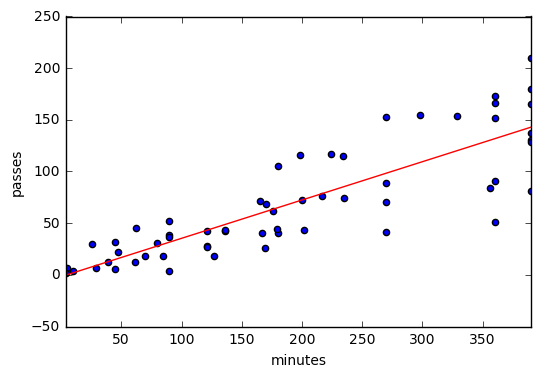

all -> Correlation coefficient for minutes versus passes:  0.845958847016
{'all': 0.37086102779538566, 'goalkeeper': 0.28205128205128177}


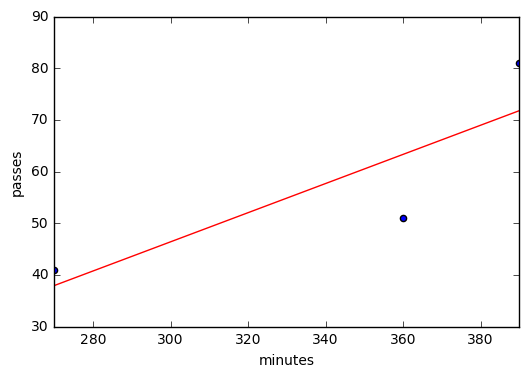

goalkeeper -> Correlation coefficient for minutes versus passes:  0.846153846154
{'defender': 0.43674261801531322, 'all': 0.37086102779538566, 'goalkeeper': 0.28205128205128177}


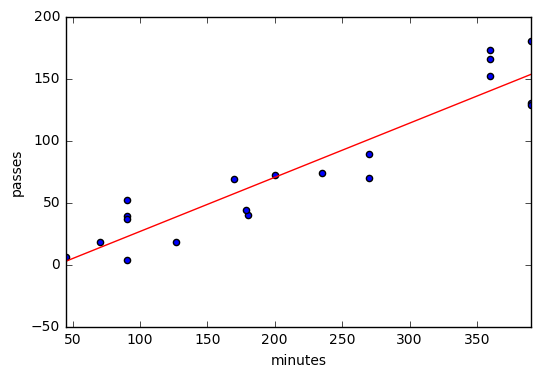

defender -> Correlation coefficient for minutes versus passes:  0.933741115644
{'defender': 0.43674261801531322, 'all': 0.37086102779538566, 'goalkeeper': 0.28205128205128177, 'midfielder': 0.45984387704129814}


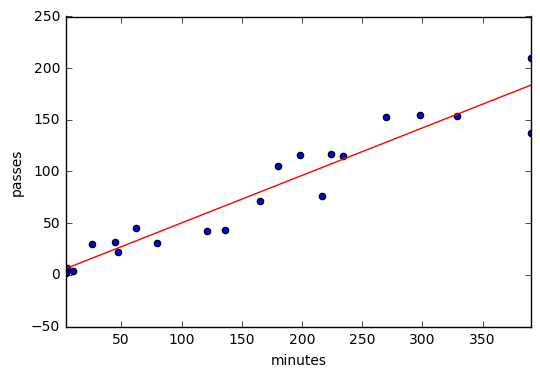

midfielder -> Correlation coefficient for minutes versus passes:  0.952119459967
{'forward': 0.32818145323163384, 'defender': 0.43674261801531322, 'all': 0.37086102779538566, 'goalkeeper': 0.28205128205128177, 'midfielder': 0.45984387704129814}


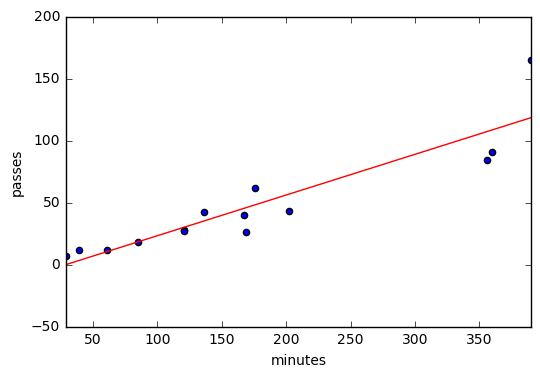

forward -> Correlation coefficient for minutes versus passes:  0.911153057074
Enter player name (or "quit" to quit): Lacen
all -> Preicted passes: 98.3792038696
goalkeeper -> Preicted passes: 37.9230769231
defender -> Preicted passes: 100.89796466
midfielder -> Preicted passes: 128.409068605
forward -> Preicted passes: 78.9965877158
Actual passes:  158


In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.

# Use linear regression for number-of-passes predictor.
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal

positions = ['all', 'goalkeeper', 'defender', 'midfielder', 'forward']
a = {}
b = {}

for position in positions:
    minutes = []
    passes = []
    for player in players:
        if player['team'] == 'Greece' or player['team'] == 'USA' or player['team'] == 'Portugal':
            if(position == 'all' or player['position'] == position):
                minutes.append(float(player['minutes']))
                passes.append(float(player['passes']))
    
    plt.xlabel('minutes')
    plt.ylabel('passes')
    plt.scatter(minutes,passes)
    a[position], b[position] = np.polyfit(minutes, passes, 1) # Regression line is y = ax + b
    x1 = min(minutes)
    x2 = max(minutes)
    plt.plot([x1,x2], [a[position]*x1 + b[position], a[position]*x2 + b[position]], color='red')
    print a
    plt.xlim(x1,x2)
    plt.show()
    cc = np.corrcoef(minutes,passes)[1,0]
    print position, '-> Correlation coefficient for minutes versus passes: ', cc

while True:
    name = raw_input('Enter player name (or "quit" to quit): ')
    if name == 'quit':
        break
    else:
        i = 0
        while i < len(players) and players[i]['surname'] != name: i += 1
        if i == len(players):
            print 'Team not in the dataset'
        else:
            for position in positions:
                print position, '-> Preicted passes:', a[position] * float(players[i]['minutes']) + b[position]
            print 'Actual passes: ', players[i]['passes']